In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
PATH_OF_DATA= '/content/gdrive/"My Drive"/foreground'
!ls {PATH_OF_DATA}

10.jpg	9.jpg


In [ ]:
import os
os.listdir('/content/gdrive/My Drive/foreground')

['9.jpg', '10.jpg']

In [ ]:
import shutil
catoonized_images = 'cartooonized_images'
if os.path.exists(catoonized_images):
  shutil.rmtree(catoonized_images)
os.makedirs(catoonized_images)

In [ ]:
catoonized_images = 'test_images'
if os.path.exists(catoonized_images):
  shutil.rmtree(catoonized_images)
os.makedirs(catoonized_images)

In [ ]:
catoonized_images = 'saved_models'
if os.path.exists(catoonized_images):
  shutil.rmtree(catoonized_images)
os.makedirs(catoonized_images)

In [ ]:
import os
os.listdir()

['.config',
 'cartooonized_images',
 'gdrive',
 'test_images',
 'saved_models',
 'sample_data']

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving guided_filter.py to guided_filter.py
Saving network.py to network.py
User uploaded file "guided_filter.py" with length 2475 bytes
User uploaded file "network.py" with length 2170 bytes


In [ ]:
os.listdir()

['.config',
 'cartooonized_images',
 'guided_filter.py',
 'gdrive',
 'test_images',
 'saved_models',
 'network.py',
 'sample_data']

In [ ]:
os.chdir('test_images/')

In [ ]:
import shutil
import os
lists=os.listdir('/content/gdrive/My Drive/foreground')
for lis in lists:
  shutil.move(f'/content/gdrive/My Drive/foreground/{lis}','/content/test_images')

In [ ]:
os.chdir('../')

In [ ]:
os.chdir('saved_models/')

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving checkpoint to checkpoint
Saving model-33999.data-00000-of-00001 to model-33999.data-00000-of-00001
User uploaded file "checkpoint" with length 121 bytes
User uploaded file "model-33999.data-00000-of-00001" with length 5868300 bytes


In [ ]:
os.chdir('../')

In [ ]:
os.getcwd()

'/content'

In [ ]:
pip install network

  Created wheel for network: filename=network-0.1-cp37-none-any.whl size=3157 sha256=c62122c08a5f4099f1922fcf51033dc4ebf3c821896c82cfff0a0e746efc73bf
  Stored in directory: /root/.cache/pip/wheels/f6/e7/6a/70989d7246573ac455e33b059ed204518c33e9c276965f005f
Successfully built network


In [ ]:
pip install tensorflow==1.13.0rc1

     |████████████████████████████████| 92.7MB 57kB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 368kB 45.1MB/s 
     |████████████████████████████████| 3.1MB 49.6MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf 
import network
import guided_filter
from tqdm import tqdm

In [ ]:
def resize_crop(image):
    h, w, c = np.shape(image)
    if min(h, w) > 720:
        if h > w:
            h, w = int(720*h/w), 720
        else:
            h, w = 720, int(720*w/h)
    image = cv2.resize(image, (w, h),
                       interpolation=cv2.INTER_AREA)
    h, w = (h//8)*8, (w//8)*8
    image = image[:h, :w, :]
    return image
    

In [ ]:
def cartoonize(load_folder, save_folder, model_path):
    input_photo = tf.placeholder(tf.float32, [1, None, None, 3])
    network_out = network.unet_generator(input_photo)
    final_out = guided_filter.guided_filter(input_photo, network_out, r=1, eps=5e-3)

    all_vars = tf.trainable_variables()
    gene_vars = [var for var in all_vars if 'generator' in var.name]
    saver = tf.train.Saver(var_list=gene_vars)
  
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(config=config)

    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint(model_path))
    name_list = os.listdir(load_folder)
    for name in tqdm(name_list):
        try:
            load_path = os.path.join(load_folder, name)
            save_path = os.path.join(save_folder, name)
            image = cv2.imread(load_path)
            image = resize_crop(image)
            batch_image = image.astype(np.float32)/127.5 - 1
            batch_image = np.expand_dims(batch_image, axis=0)
            output = sess.run(final_out, feed_dict={input_photo: batch_image})
            output = (np.squeeze(output)+1)*127.5
            output = np.clip(output, 0, 255).astype(np.uint8)
            cv2.imwrite(save_path, output)
        except:
            print('cartoonize {} failed'.format(load_path))

In [ ]:
if __name__ == '__main__':
    model_path = 'saved_models'
    load_folder = 'test_images'
    save_folder = 'cartooonized_images'
    if not os.path.exists(save_folder):
        os.mkdir(save_folder)
    cartoonize(load_folder, save_folder, model_path)

AttributeError: ignored

In [ ]:
os.listdir()

['.config',
 'cartooonized_images',
 'sample_data',
 'guided_filter.py',
 '__pycache__',
 '.ipynb_checkpoints',
 'test_images',
 'saved_models',
 'network.py']

In [ ]:
os.chdir('cartooonized_images/')

In [ ]:
os.listdir()

['10.jpg', '9.jpg']

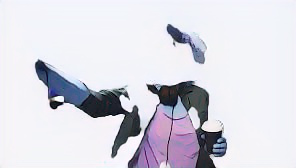

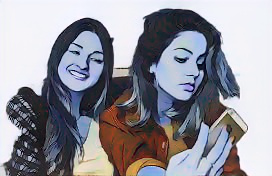

In [ ]:
from skimage import io
from google.colab.patches import cv2_imshow
lists=os.listdir()
for lis in lists:
  im=io.imread(f'{lis}')
  cv2_imshow(im)

In [ ]:
os.chdir('../')

In [ ]:
os.listdir()

['.config',
 'cartooonized_images',
 'guided_filter.py',
 'gdrive',
 '__pycache__',
 'test_images',
 'saved_models',
 'network.py',
 'sample_data']

In [ ]:
if os.path.exists("/content/drive/My Drive/cartooonized_images"):
  shutil.rmtree("/content/drive/My Drive/cartooonized_images")
!cp  -r 'cartooonized_images/' "gdrive/My Drive/"